<a href="https://colab.research.google.com/github/RomanKunal/Deep-Learning/blob/main/Batch_Normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.shape

(400, 5)

In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


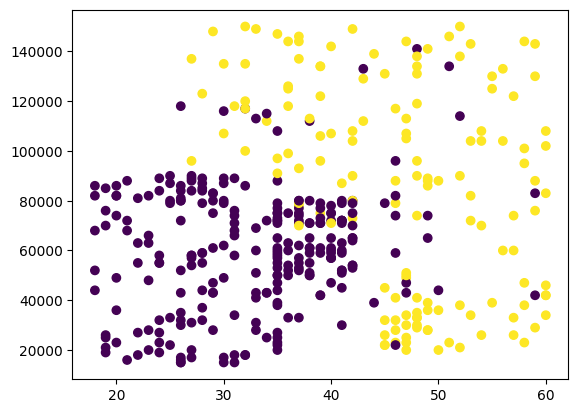

In [8]:
plt.scatter(data['Age'],data['EstimatedSalary'],c=data['Purchased'])
plt.show()

In [9]:
X=data.drop(columns=['User ID','Purchased','Gender'])
y=data['Purchased']

In [27]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [30]:


# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=False)

# Fit the model with validation split
history1 = model.fit(X, y,
                     epochs=100,                # Increase epochs for better training
                     validation_split=0.2,      # Use 20% of the data for validation
                     callbacks=[early_stop],
                     verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3231 - loss: 13903.2334 - val_accuracy: 0.6375 - val_loss: 7223.4951
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2811 - loss: 12979.6582 - val_accuracy: 0.6375 - val_loss: 6042.4639
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2831 - loss: 10351.8584 - val_accuracy: 0.6375 - val_loss: 4883.4009
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3055 - loss: 8193.6953 - val_accuracy: 0.6375 - val_loss: 3755.4019
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3022 - loss: 6368.1660 - val_accuracy: 0.6375 - val_loss: 2639.3591
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3138 - loss: 3983.5330 - val_accuracy: 0.6375 - val_loss: 1567.1755
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2879 - loss: 2347.8838 - val_accuracy: 0.6375 - val_loss: 496.2746
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3

In [33]:

model1 = Sequential()
model1.add(Dense(10, activation='relu', input_dim=2))
model1.add(BatchNormalization())  # Fixed model reference
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=True)

# Fit the model with validation split
history2 = model1.fit(X, y,
                      epochs=100,               # Increase epochs for better training
                      validation_split=0.2,     # Use 20% of the data for validation
                      callbacks=[early_stop],
                      verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3228 - loss: 0.8668 - val_accuracy: 0.3625 - val_loss: 1.9586
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3667 - loss: 0.8172 - val_accuracy: 0.3625 - val_loss: 1.1856
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3970 - loss: 0.7964 - val_accuracy: 0.3750 - val_loss: 0.8689
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4422 - loss: 0.7714 - val_accuracy: 0.6000 - val_loss: 0.7167
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5818 - loss: 0.7080 - val_accuracy: 0.6375 - val_loss: 0.6550
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6044 - loss: 0.7113 - val_accuracy: 0.6375 - val_loss: 0.6649
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8055 - loss: 0.5838 - val_accuracy: 0.6375 - val_loss: 0.6622
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8120 - loss: 0.5853 - val_accuracy: 0.5500 - val_loss: 0.

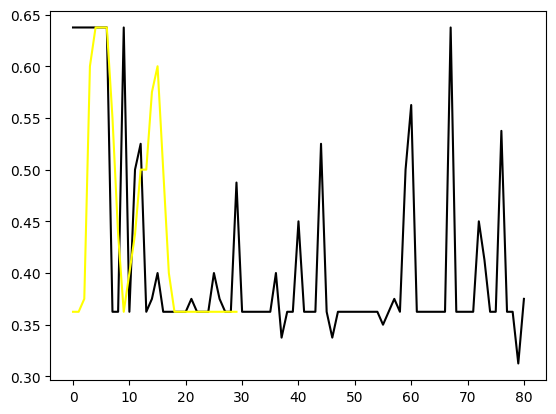

In [35]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='yellow')